### CLEANING DATA


- digunakan saat ada missing values, data ilang, error programming

- saat cleaning data harus menyiapkan TM....
- harus mengetahui data dan subjek data tsb

In [586]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [587]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [588]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [589]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [590]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [591]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [592]:
#buat describe tipe data float
df.describe()

,PID,ST_NUM
count,8.000000e+00,7.000000
mean,1.000050e+08,191.428571
std,2.927700e+03,39.080503
min,1.000010e+08,104.000000
25%,1.000028e+08,199.000000
50%,1.000050e+08,203.000000
75%,1.000072e+08,210.000000
max,1.000090e+08,215.000000


In [593]:
df["OWN_OCCUPIED"].describe()

count     8
unique    3
top       Y
freq      5
Name: OWN_OCCUPIED, dtype: object

In [594]:
#kenapa unique nya 12, bisa dicek ke 
df["OWN_OCCUPIED"].unique

<bound method Series.unique of 0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object>

In [595]:
#tipe data missing values nan
type(np.nan)

float

In [596]:
#tipe data missing values na
type('na')

str

- ST_NUM: street number
- ST_NAME: street name
- OWN_OCCUPIED; is the residence owner occupied
- NUM_BEDROOMS: number of bedrooms

In [597]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [598]:
df["ST_NUM"].isna()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [599]:
df["NUM_BEDROOMS"]

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [600]:
df["NUM_BEDROOMS"].isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [601]:
missing_values = ["n/a", "na", "--"]

In [602]:
#setelah data dibersihin jadi:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


Missing Values
- Standard missing values (berbentuk np.nan, ,,)
- Non standard missing values (berbentuk "na", "n/a", "not available", "-", "--", "999999)
- Unexpected missing values (data yang berbeda dari desain, kayak contoh di data ini pertanyaannya rumahnya ditinggalin atau gak, jawabannya 12)

In [603]:
df.shape

(9, 7)

In [604]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [605]:
df.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [606]:
df.describe()

,PID,ST_NUM
count,8.000000e+00,7.000000
mean,1.000050e+08,191.428571
std,2.927700e+03,39.080503
min,1.000010e+08,104.000000
25%,1.000028e+08,199.000000
50%,1.000050e+08,203.000000
75%,1.000072e+08,210.000000
max,1.000090e+08,215.000000


In [607]:
df[["ST_NAME", "OWN_OCCUPIED", "NUM_BATH"]].describe()

,ST_NAME,OWN_OCCUPIED,NUM_BATH
count,9,8,8
unique,5,3,4
top,BERKELEY,Y,1
freq,3,5,4


In [608]:
print(df["ST_NAME"].unique())
print(df["OWN_OCCUPIED"].unique())
print(df["NUM_BATH"].unique())

['PUTNAM' 'LEXINGTON' 'BERKELEY' 'WASHINGTON' 'TREMONT']
['Y' 'N' '12' nan]
['1' '1.5' nan '2' 'HURLEY']


In [609]:
df["OWN_OCCUPIED"]

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [610]:
#cara biar 12 jadi nan
df["OWN_OCCUPIED"].replace("12", np.nan, inplace=True)

In [611]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [612]:
df.isna()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,True,False,False
3,False,False,False,True,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False


In [613]:
df.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [614]:
#nunjukin .....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  7 non-null      object 
 4   NUM_BEDROOMS  7 non-null      object 
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 632.0+ bytes


In [615]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [616]:
df.isna().sum(axis=1)

0    0
1    0
2    2
3    2
4    1
5    1
6    2
7    1
8    0
dtype: int64

In [617]:
df.isna().values.any()

True

In [618]:
df.isna().any().any()

True

In [619]:
df.isna().sum().sum()

9

In [620]:
df.isna().values.sum()

9

### REPLACING

In [621]:
df["ST_NUM"].fillna(100, inplace=True)

In [622]:
def kali():
    return hasil_filling

def bagi():
    dataawal = hasil_filling
    return

In [623]:
df["ST_NUM"]

0    104.0
1    197.0
2    100.0
3    201.0
4    203.0
5    207.0
6    100.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [624]:
df.loc[2, "ST_NUM"] = 199

In [625]:
df["ST_NUM"]

0    104.0
1    197.0
2    199.0
3    201.0
4    203.0
5    207.0
6    100.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [626]:
df["NUM_BEDROOMS"]

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [627]:
median = df["NUM_BEDROOMS"].median()
df["NUM_BEDROOMS"].fillna(median, inplace=True)

TypeError: could not convert string to float: '--'

In [ ]:
df["NUM_BEDROOMS"]

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [ ]:
help(pd.DataFrame.fillna)

Help on function fillna in module pandas.core.frame:

fillna(self, value: 'Hashable | Mapping | Series | DataFrame' = None, *, method: 'FillnaOptions | None' = None, axis: 'Axis | None' = None, inplace: 'bool' = False, limit: 'int | None' = None, downcast: 'dict | None' = None) -> 'DataFrame | None'
    Fill NA/NaN values using the specified method.
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame).  Values not
        in the dict/Series/DataFrame will not be filled. This value cannot
        be a list.
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series
        pad / ffill: propagate last valid observation forward to next valid
        backfill / bfill: use next valid observation to f

### OBESITY

In [ ]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [ ]:
data = pd.ExcelFile("https://github.com/ardhiraka/PFDS_sources/blob/master/obes.xls?raw=true")

In [ ]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [ ]:
data_age = data.parse(u"7.2", skiprows=4, skipfooter=14)

In [ ]:
df_age = pd.read_excel("https://github.com/ardhiraka/PFDS_sources/blob/master/obes.xls?raw=true",
                    sheet_name="7.2", skiprows=4, skipfooter=14
                    )

In [ ]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [ ]:
data_age.shape

(12, 10)

In [ ]:
##rename data unnamed##
#data_age.rename({"Unnamed: 0": "Year"}, axis=1)
#data_age.head()

In [ ]:
##drop 1 baris na##
#data_age.dropna(how="all", axis=0, inplace=True)
#data_age.head()

In [ ]:
##cara menjumlahkan##
#data_age[["Under 16", "16-24", "25-34", "35-44" ]]

In [ ]:
#data_age.iloc[:, 2:].sum(axis=1)

##kita gabisa nyebut kolomnya aja tanpa baris, jadi harus (baris kolom)

In [ ]:
data_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11 non-null     object 
 1   Total        11 non-null     float64
 2   Under 16     11 non-null     float64
 3   16-24        11 non-null     float64
 4   25-34        11 non-null     float64
 5   35-44        11 non-null     float64
 6   45-54        11 non-null     float64
 7   55-64        11 non-null     float64
 8   65-74        11 non-null     float64
 9   75 and over  11 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1.1+ KB


In [ ]:
data_age.isna().any()

Unnamed: 0     True
Total          True
Under 16       True
16-24          True
25-34          True
35-44          True
45-54          True
55-64          True
65-74          True
75 and over    True
dtype: bool

In [ ]:
data_age.isna().all(axis=1)

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool

In [ ]:
data_age.isna().all()

Unnamed: 0     False
Total          False
Under 16       False
16-24          False
25-34          False
35-44          False
45-54          False
55-64          False
65-74          False
75 and over    False
dtype: bool

In [ ]:
data_age.describe()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,6299.181818,590.454545,232.000000,788.181818,1723.454545,1740.454545,935.636364,227.727273,59.363636
std,4314.955778,108.405132,133.192342,555.484080,1215.902822,1412.783166,797.295713,185.395302,34.383929
min,1275.000000,400.000000,65.000000,136.000000,289.000000,216.000000,94.000000,36.000000,20.000000
25%,2299.500000,536.000000,101.500000,314.000000,562.000000,459.000000,216.000000,62.000000,28.000000
50%,5018.000000,579.000000,228.000000,564.000000,1469.000000,1198.000000,598.000000,157.000000,53.000000
75%,10764.000000,644.000000,358.500000,1386.500000,2924.000000,3190.500000,1687.500000,417.000000,90.500000
max,11736.000000,775.000000,391.000000,1484.000000,3277.000000,3581.000000,2119.000000,495.000000,115.000000


In [ ]:
data_age = data_age.rename({"Unnamed: 0": "Year"}, axis=1)
# data_age = data_age.rename(columns={"Unnamed: 0": "Year"})
data_age.head()

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


In [ ]:
data_age.dropna(how="all", axis=0, inplace=True)
data_age.head()

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
1,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
3,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
4,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


In [ ]:
data_age.reset_index(drop=True, inplace=True)
data_age.head()

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
1,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
3,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
4,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


In [ ]:
data_age["Total"] - data_age.iloc[:, 2:].sum(axis=1)

0     0.0
1     0.0
2     1.0
3     3.0
4     0.0
5     4.0
6     3.0
7     2.0
8     8.0
9     0.0
10    0.0
dtype: float64

In [ ]:
data_age[["Under 16", "16-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75 and over"]].sum(axis=1)

0      1275.0
1      1711.0
2      2034.0
3      2561.0
4      3862.0
5      5014.0
6      7985.0
7     10569.0
8     11566.0
9     11736.0
10    10957.0
dtype: float64

<Axes: >

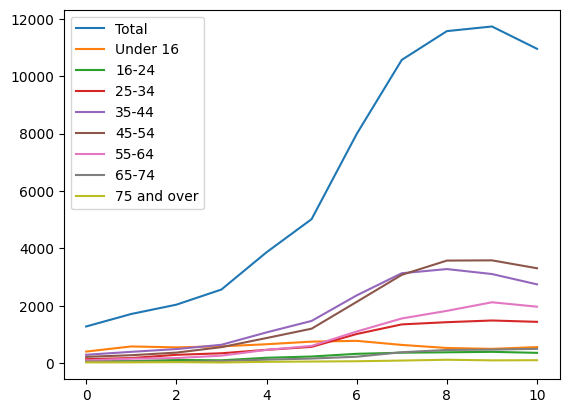

In [ ]:
data_age.plot()

In [ ]:
data_age_minus_total = data_age.drop("Total", axis=1)

<Axes: >

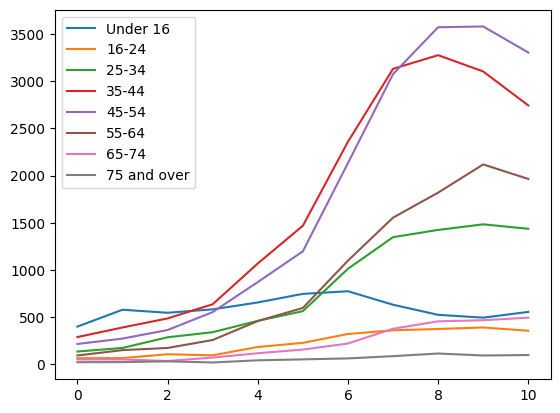

In [ ]:
data_age_minus_total.plot()

<Axes: >

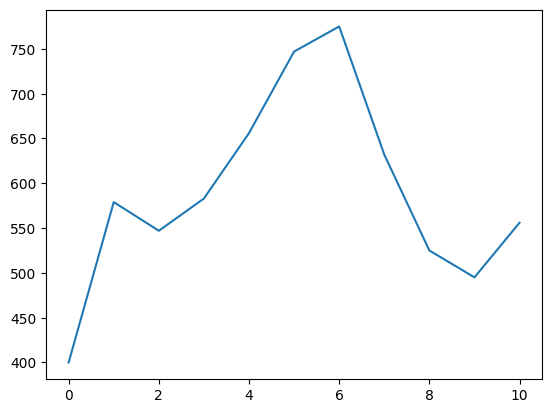

In [ ]:
data_age['Under 16'].plot()

<Axes: >

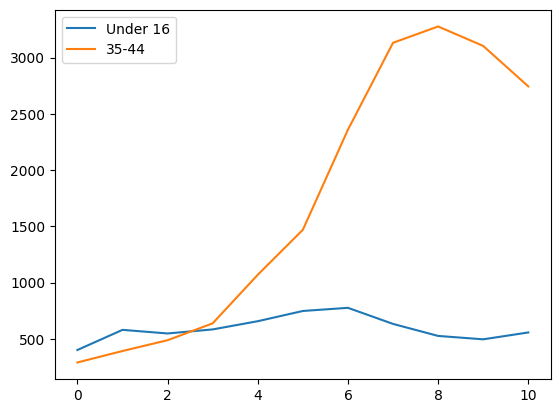

In [628]:
#liat perbandingan anak2 dan dewasa
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['35-44'].plot(label="35-44", legend=True)

In [629]:
#Month/Date/Year
pd.date_range("1/1/2020", "1/8/2020")

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08'],
              dtype='datetime64[ns]', freq='D')

In [630]:
date_range = pd.date_range("1/01/2020", "1/08/2020", freq="H")

In [631]:
date_range

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

KETENTUAN ISO
- YYYY-MM-DD
- HH:MM:SS:SSSS

In [632]:
df = pd.DataFrame(date_range, columns=['date'])

In [633]:
df['data'] = np.random.randint(0,100,size=(len(date_range)))

In [634]:
df.head()

,date,data
0,2020-01-01 00:00:00,1
1,2020-01-01 01:00:00,64
2,2020-01-01 02:00:00,80
3,2020-01-01 03:00:00,72
4,2020-01-01 04:00:00,31


In [635]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    169 non-null    datetime64[ns]
 1   data    169 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


In [636]:
df['datetime'] = pd.to_datetime(df['date'])

In [637]:
df.head(10)

,date,data,datetime
0,2020-01-01 00:00:00,1,2020-01-01 00:00:00
1,2020-01-01 01:00:00,64,2020-01-01 01:00:00
2,2020-01-01 02:00:00,80,2020-01-01 02:00:00
3,2020-01-01 03:00:00,72,2020-01-01 03:00:00
4,2020-01-01 04:00:00,31,2020-01-01 04:00:00
5,2020-01-01 05:00:00,64,2020-01-01 05:00:00
6,2020-01-01 06:00:00,64,2020-01-01 06:00:00
7,2020-01-01 07:00:00,70,2020-01-01 07:00:00
8,2020-01-01 08:00:00,55,2020-01-01 08:00:00
9,2020-01-01 09:00:00,41,2020-01-01 09:00:00


In [638]:
df.set_index("datetime", inplace=True)

In [639]:
df.drop("date", axis=1, inplace=True)

In [640]:
df.head()

,data
datetime,
2020-01-01 00:00:00,1
2020-01-01 01:00:00,64
2020-01-01 02:00:00,80
2020-01-01 03:00:00,72
2020-01-01 04:00:00,31


In [641]:
string_date_range = [str(x) for x in date_range]

In [642]:
help(pd.to_datetime)

Help on function to_datetime in module pandas.core.tools.datetimes:

to_datetime(arg: 'DatetimeScalarOrArrayConvertible | DictConvertible', errors: 'DateTimeErrorChoices' = 'raise', dayfirst: 'bool' = False, yearfirst: 'bool' = False, utc: 'bool | None' = None, format: 'str | None' = None, exact: 'bool' = True, unit: 'str | None' = None, infer_datetime_format: 'bool' = False, origin='unix', cache: 'bool' = True) -> 'DatetimeIndex | Series | DatetimeScalar | NaTType | None'
    Convert argument to datetime.
    
    This function converts a scalar, array-like, :class:`Series` or
    :class:`DataFrame`/dict-like to a pandas datetime object.
    
    Parameters
    ----------
    arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like
        The object to convert to a datetime. If a :class:`DataFrame` is provided, the
        method expects minimally the following columns: :const:`"year"`,
        :const:`"month"`, :const:`"day"`.
    errors : {'ignore', 'rai

In [643]:
timestamp_date_range = pd.to_datetime(string_date_range, infer_datetime_format=True)

In [644]:
string_date_range_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']

In [645]:
pd.to_datetime(string_date_range_2, format="%B-%d-%Y")

DatetimeIndex(['2020-06-01', '2020-06-02', '2020-06-03'], dtype='datetime64[ns]', freq=None)

In [646]:
pd.DataFrame(pd.to_datetime(string_date_range_2, format="%B-%d-%Y"), columns=["date"])

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


In [647]:
timestamp_date_range_2 = [datetime.strptime(x,'%B-%d-%Y') for x in string_date_range_2]
timestamp_date_range_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [648]:
df2 = pd.DataFrame(timestamp_date_range_2, columns=["date"])
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


In [649]:
df[df.index.day == 2]

,data
datetime,
2020-01-02 00:00:00,50
2020-01-02 01:00:00,89
2020-01-02 02:00:00,15
2020-01-02 03:00:00,85
2020-01-02 04:00:00,32
2020-01-02 05:00:00,17
2020-01-02 06:00:00,96
2020-01-02 07:00:00,28
2020-01-02 08:00:00,50


In [650]:
df.loc["2020-01-03"]

,data
datetime,
2020-01-03 00:00:00,34
2020-01-03 01:00:00,83
2020-01-03 02:00:00,66
2020-01-03 03:00:00,77
2020-01-03 04:00:00,3
2020-01-03 05:00:00,12
2020-01-03 06:00:00,50
2020-01-03 07:00:00,21
2020-01-03 08:00:00,21


In [651]:
df.loc['2020-01-04':'2020-01-06']

,data
datetime,
2020-01-04 00:00:00,21
2020-01-04 01:00:00,11
2020-01-04 02:00:00,62
2020-01-04 03:00:00,90
2020-01-04 04:00:00,27
...,...
2020-01-06 19:00:00,72
2020-01-06 20:00:00,56
2020-01-06 21:00:00,54


In [652]:
df.resample('D').mean()

,data
datetime,
2020-01-01,53.375000
2020-01-02,38.291667
2020-01-03,48.500000
2020-01-04,47.458333
2020-01-05,41.416667
2020-01-06,38.666667
2020-01-07,44.875000
2020-01-08,50.000000


In [653]:
df['rolling_sum'] =df.rolling(3).sum()
df.head(10)

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,1,NaN
2020-01-01 01:00:00,64,NaN
2020-01-01 02:00:00,80,145.0
2020-01-01 03:00:00,72,216.0
2020-01-01 04:00:00,31,183.0
2020-01-01 05:00:00,64,167.0
2020-01-01 06:00:00,64,159.0
2020-01-01 07:00:00,70,198.0
2020-01-01 08:00:00,55,189.0


In [656]:
df["rolling_sum_backfilled"] = df["rolling_sum"].fillna(method="backfill")
df.head(10)

,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2020-01-01 00:00:00,1,NaN,145.0
2020-01-01 01:00:00,64,NaN,145.0
2020-01-01 02:00:00,80,145.0,145.0
2020-01-01 03:00:00,72,216.0,216.0
2020-01-01 04:00:00,31,183.0,183.0
2020-01-01 05:00:00,64,167.0,167.0
2020-01-01 06:00:00,64,159.0,159.0
2020-01-01 07:00:00,70,198.0,198.0
2020-01-01 08:00:00,55,189.0,189.0


### TIMESERIES DATASET

In [665]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')
opsd_daily.shape

(4383, 5)

In [666]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [667]:
opsd_daily.isna().any()

Date           False
Consumption    False
Wind            True
Solar           True
Wind+Solar      True
dtype: bool

In [668]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [669]:
opsd_daily.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [670]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [671]:
pd.to_datetime(opsd_daily.index)

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [672]:
opsd_daily = pd.read_csv(
    'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv',
    index_col=0, parse_dates=True
)
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [673]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Name: 2017-08-10 00:00:00, dtype: float64

In [674]:
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2014-01-20,1590.687,78.647,6.371,85.018
2014-01-21,1624.806,15.643,5.835,21.478
2014-01-22,1625.155,60.259,11.992,72.251


In [675]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2012-02-01,1511.866,199.607,43.502,243.109
2012-02-02,1563.407,73.469,44.675,118.144
2012-02-03,1563.631,36.352,46.510,82.862
2012-02-04,1372.614,20.551,45.225,65.776
2012-02-05,1279.432,55.522,54.572,110.094
2012-02-06,1574.766,34.896,55.389,90.285
2012-02-07,1615.078,100.312,19.867,120.179
2012-02-08,1613.774,93.763,36.930,130.693
2012-02-09,1591.532,132.219,19.042,151.261


In [676]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


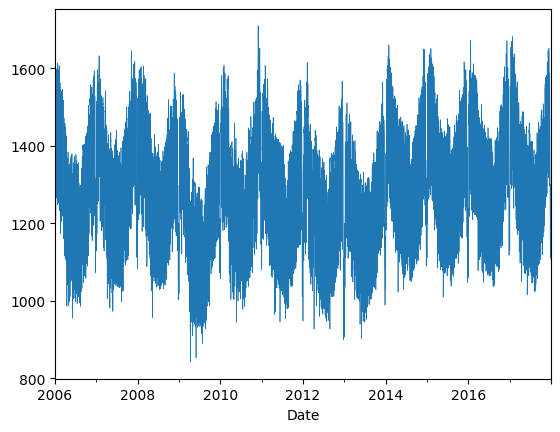

In [677]:
opsd_daily["Consumption"].plot(linewidth=0.5);

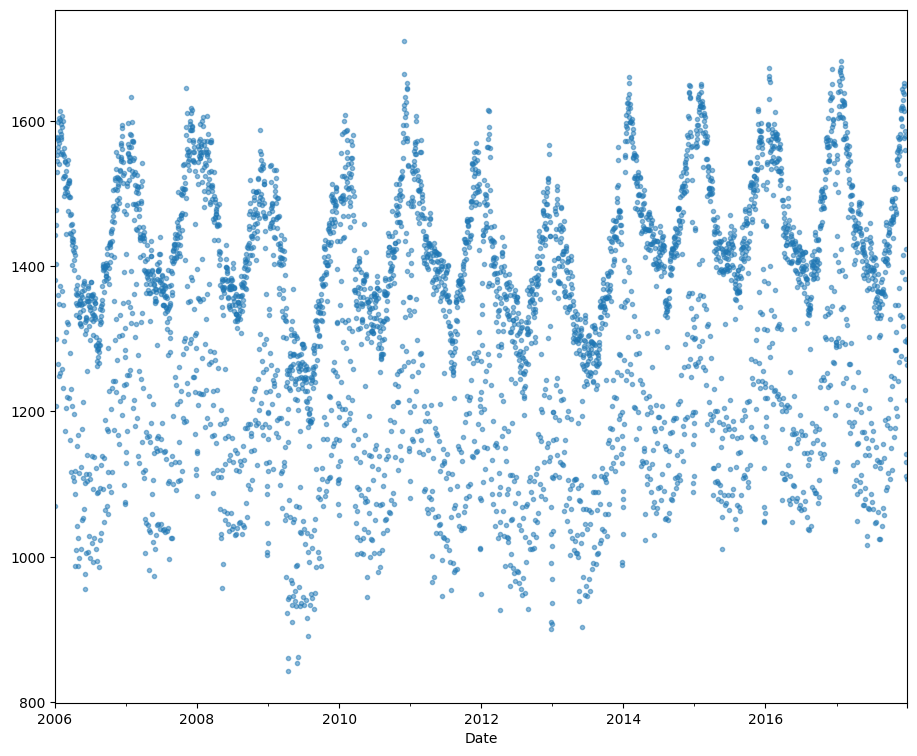

In [678]:
opsd_daily.loc[:, 'Consumption'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

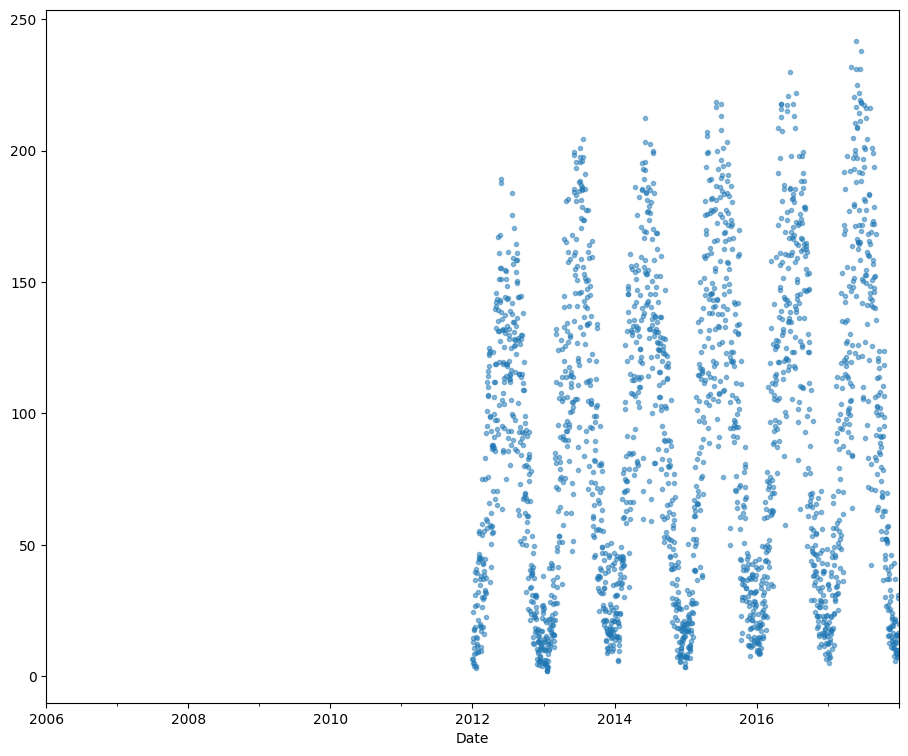

In [679]:
opsd_daily.loc[:, 'Solar'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

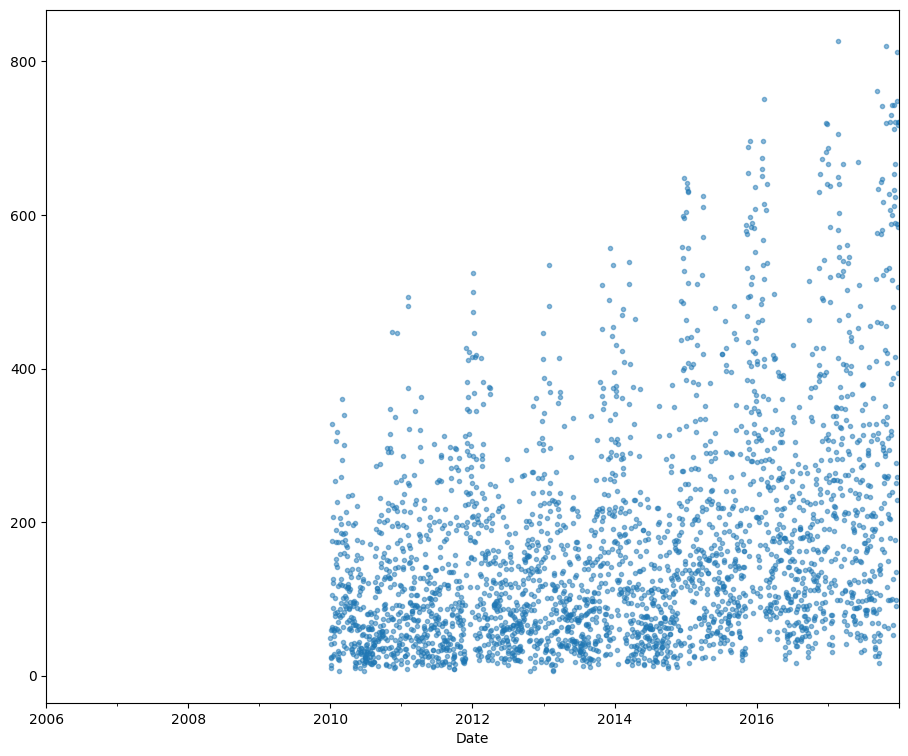

In [683]:
opsd_daily.loc[:, 'Wind'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9));

Text(0, 0.5, 'Daily Consumption (GWh)')

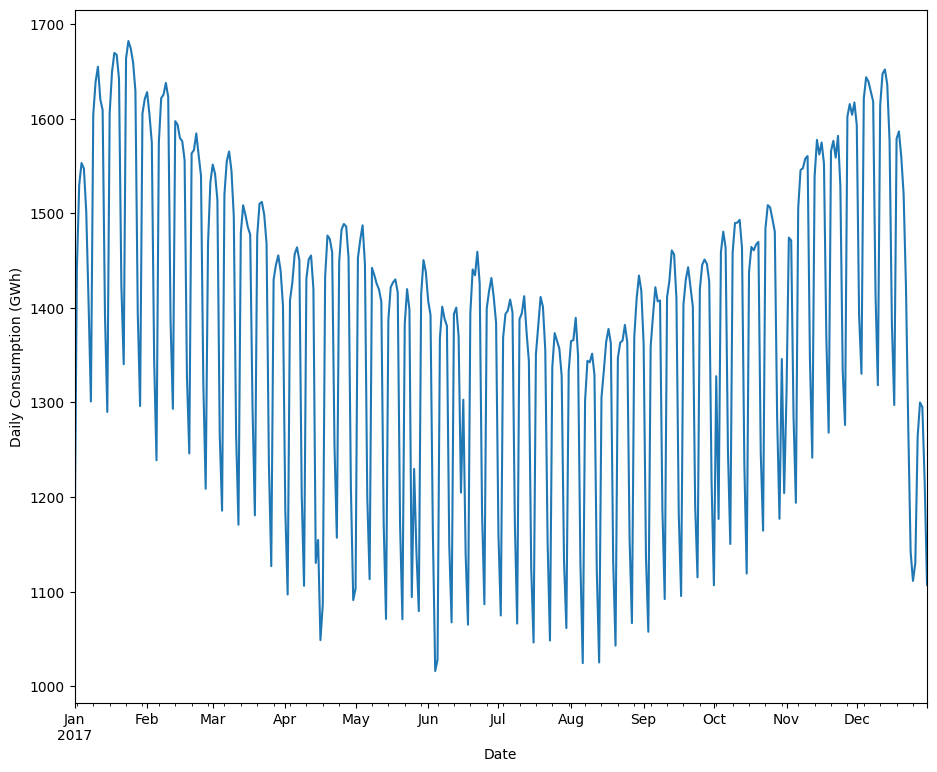

In [684]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11, 9))
ax.set_ylabel('Daily Consumption (GWh)')

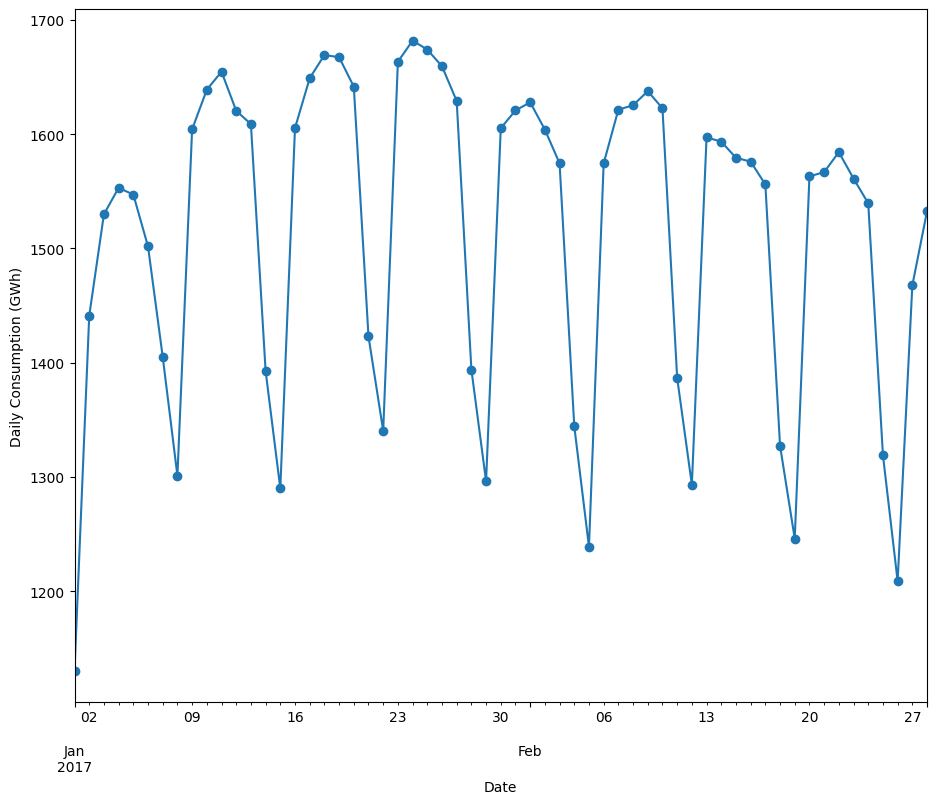

In [685]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-', figsize=(11, 9))
ax.set_ylabel('Daily Consumption (GWh)');

In [686]:
opsd_daily["Month"] = opsd_daily.index.month
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Month
Date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1
2006-01-02,1380.521,NaN,NaN,NaN,1
2006-01-03,1442.533,NaN,NaN,NaN,1
2006-01-04,1457.217,NaN,NaN,NaN,1
2006-01-05,1477.131,NaN,NaN,NaN,1


<Axes: title={'center': 'Consumption'}, xlabel='Month'>

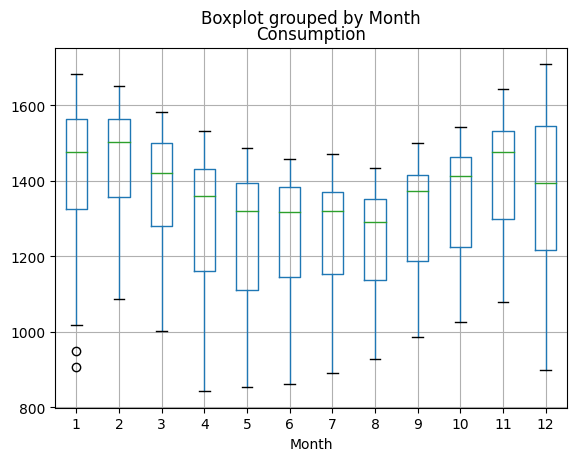

In [687]:
opsd_daily.boxplot(column=['Consumption'], by='Month')

<Axes: title={'center': 'Solar'}, xlabel='Month'>

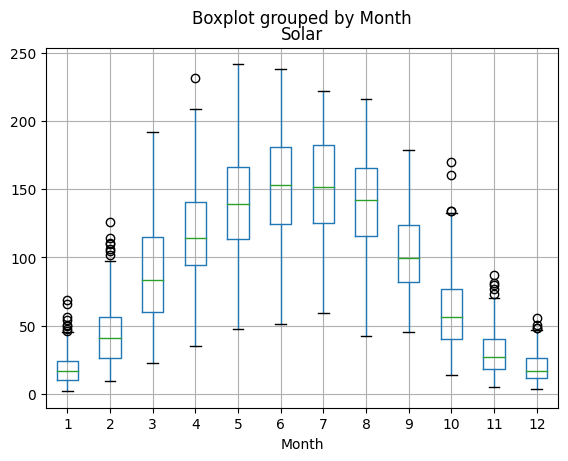

In [688]:
opsd_daily.boxplot(column=['Solar'], by='Month')

<Axes: title={'center': 'Wind'}, xlabel='Month'>

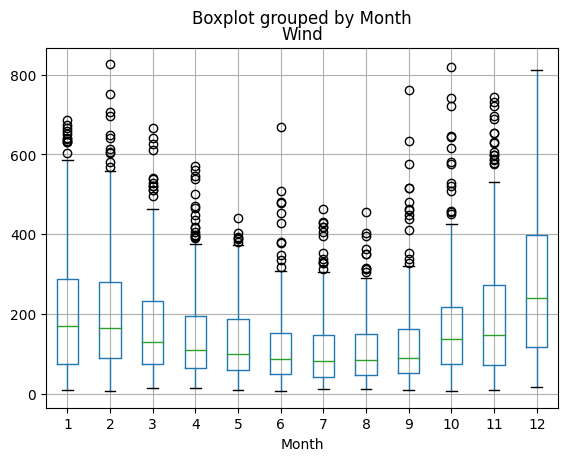

In [689]:
opsd_daily.boxplot(column=['Wind'], by='Month')

In [690]:
opsd_daily["Weekday"] = opsd_daily.index.weekday
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Month,Weekday
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,6
2006-01-02,1380.521,NaN,NaN,NaN,1,0
2006-01-03,1442.533,NaN,NaN,NaN,1,1
2006-01-04,1457.217,NaN,NaN,NaN,1,2
2006-01-05,1477.131,NaN,NaN,NaN,1,3


<Axes: title={'center': 'Consumption'}, xlabel='Weekday'>

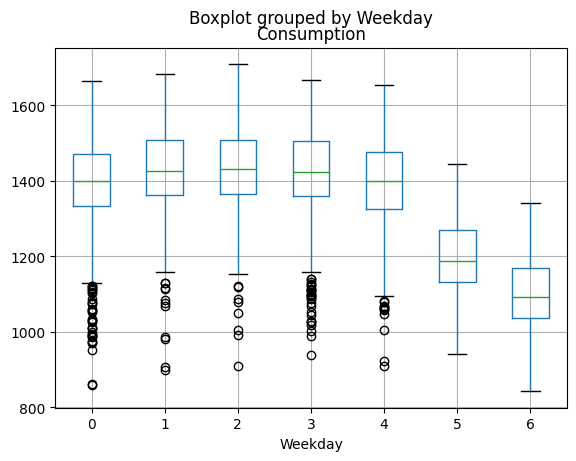

In [691]:
opsd_daily.boxplot(column=['Consumption'], by='Weekday')

<Axes: title={'center': 'Solar'}, xlabel='Weekday'>

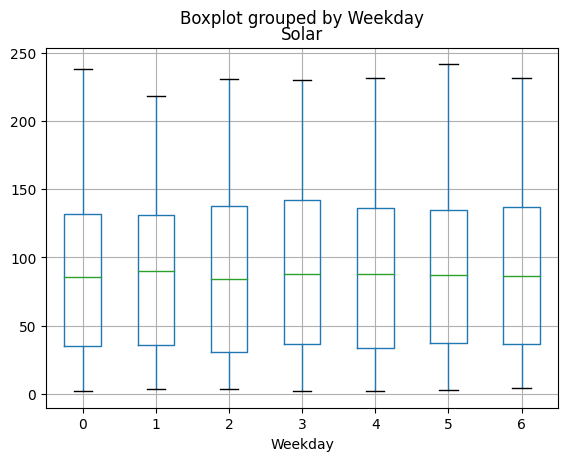

In [692]:
opsd_daily.boxplot(column=['Solar'], by='Weekday')


<Axes: title={'center': 'Wind'}, xlabel='Weekday'>

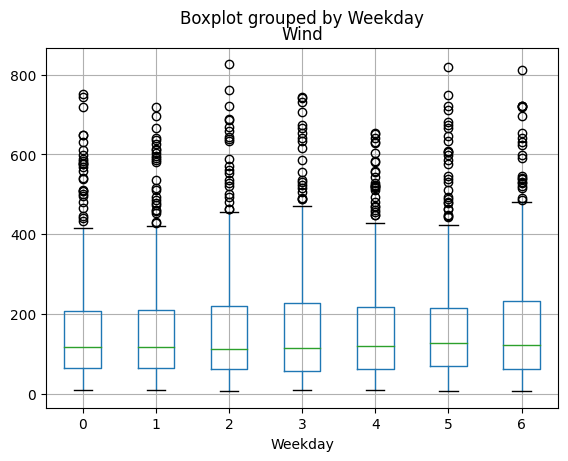

In [693]:
opsd_daily.boxplot(column=['Wind'], by='Weekday')

In [694]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


In [695]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


In [696]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


In [697]:
4383/627

6.990430622009569

<Axes: xlabel='Date'>

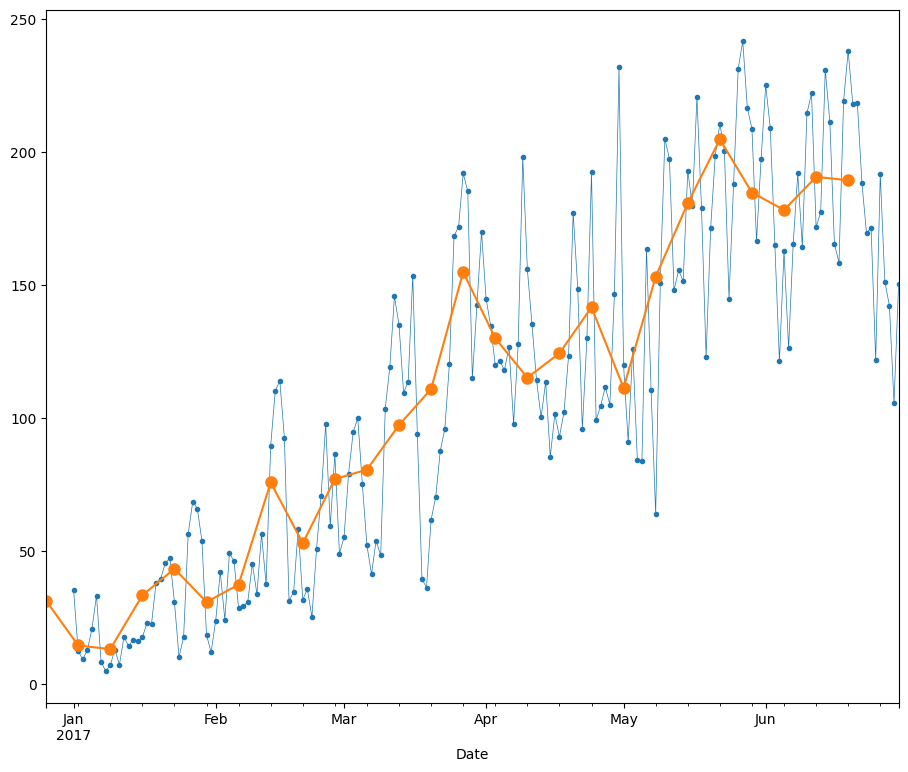

In [699]:
start, end = '2017-01', '2017-06'

opsd_daily.loc[start:end, 'Solar'].plot(marker='.', linestyle='-', linewidth=0.5, figsize=(11, 9))
opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o', markersize=8, linestyle='-', figsize=(11, 9))